In [ ]:
#clone source code
%cd /content/drive/MyDrive/yolov7_train
!git clone https://github.com/WongKinYiu/yolov7.git

In [ ]:
#cai thu vien
%cd /content/drive/MyDrive/yolov7_train/yolov7
!pip install -r requirements.txt

In [ ]:
#tai weights ve test
%cd /content/drive/MyDrive/yolov7_train/yolov7
!mkdir pretrain
%cd pretrain
!wget https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7.pt

#https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7.pt

In [ ]:
%cd /content/drive/MyDrive/yolov7_train/yolov7
!mkdir test_images
%cd test_images
!wget https://media.vietq.vn/files/Nhung_khau_sung_ngan_tot_nhat_the_gioi_2.jpg
!wget https://store.bbcosplay.com/products/sung-ngan-2.jpg
!wget https://vnn-imgs-f.vgcloud.vn/2021/06/16/09/sung-hoi-1.jpeg

In [7]:
#nhan dien thu voi weights
%cd /content/drive/MyDrive/yolov7_train/yolov7
!python detect.py --weights pretrain/yolov7.pt --source test_images/Nhung_khau_sung_ngan_tot_nhat_the_gioi_2.jpg

/content/drive/MyDrive/yolov7_train/yolov7
Namespace(weights=['pretrain/yolov7.pt'], source='test_images/Nhung_khau_sung_ngan_tot_nhat_the_gioi_2.jpg', img_size=640, conf_thres=0.25, iou_thres=0.45, device='', view_img=False, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=False)
YOLOR 🚀 v0.1-128-ga207844 torch 2.1.0+cu121 CUDA:0 (Tesla T4, 15102.0625MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 306 layers, 36905341 parameters, 6652669 gradients, 104.5 GFLOPS
 Convert model to Traced-model..

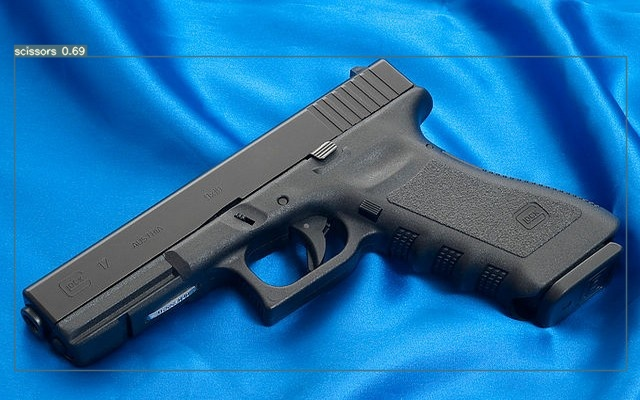

In [9]:
#xem anh
from IPython.display import Image, display
display(Image(filename="/content/drive/MyDrive/yolov7_train/yolov7/runs/detect/exp/Nhung_khau_sung_ngan_tot_nhat_the_gioi_2.jpg"))

### Train model

In [ ]:
#giai nen data
%cd /content/drive/MyDrive/yolov7_train
!mkdir train_data
%cd train_data
!unzip ../Gun_data_labeled.zip

In [13]:
'''to chuc lai thu muc train
%cd /content/drive/MyDrive/yolov7_train/train_data
!mkdir train
!mkdir train/images
!mkdir train/labels'''


/content/drive/MyDrive/yolov7_train/train_data


In [14]:
'''%cd /content/drive/MyDrive/yolov7_train/train_data/data
!mv *.jpg train/images
!mv *.txt train/labels'''

/content/drive/MyDrive/yolov7_train/train_data/data
mv: cannot stat '*.jpg': No such file or directory
mv: cannot stat '*.txt': No such file or directory


In [15]:
#khai bao 1 file yaml:
%cd /content/drive/MyDrive/yolov7_train/yolov7
!rm data/mydataset.yaml
!echo 'train: ../train_data/data' >> data/mydataset.yaml
!echo 'val: ../train_data/data' >> data/mydataset.yaml
!echo 'nc: 1' >> data/mydataset.yaml
!echo "names: ['gun']" >> data/mydataset.yaml



/content/drive/MyDrive/yolov7_train/yolov7
rm: cannot remove 'data/mydataset.yaml': No such file or directory


## vao train

In [17]:
%cd /content/drive/MyDrive/yolov7_train/yolov7
!python train.py --batch 8 --cfg cfg/training/yolov7.yaml --epochs 10 --data data/mydataset.yaml --weights 'pretrain/yolov7.pt'

/content/drive/MyDrive/yolov7_train/yolov7
2023-12-20 16:32:49.927316: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-20 16:32:49.927375: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-20 16:32:49.928690: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-20 16:32:49.935911: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
20

In [18]:
%cd /content/drive/MyDrive/yolov7_train/yolov7
!python detect.py --weights runs/train/exp2/weights/best.pt --source test_images/Nhung_khau_sung_ngan_tot_nhat_the_gioi_2.jpg

/content/drive/MyDrive/yolov7_train/yolov7
Namespace(weights=['runs/train/exp2/weights/best.pt'], source='test_images/Nhung_khau_sung_ngan_tot_nhat_the_gioi_2.jpg', img_size=640, conf_thres=0.25, iou_thres=0.45, device='', view_img=False, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=False)
YOLOR 🚀 v0.1-128-ga207844 torch 2.1.0+cu121 CUDA:0 (Tesla T4, 15102.0625MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 314 layers, 36481772 parameters, 6194944 gradients, 103.2 GFLOPS
 Conve

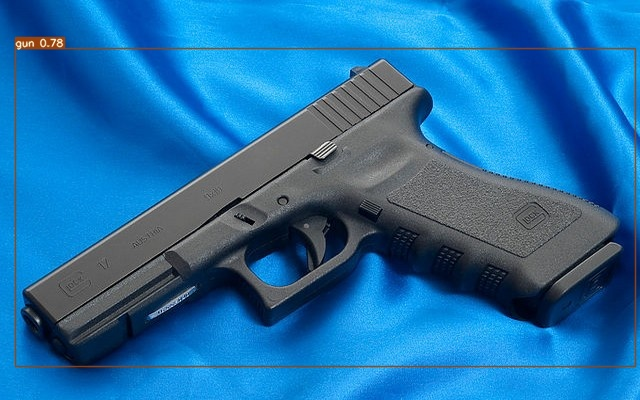

In [19]:
#xem anh
from IPython.display import Image, display
display(Image(filename="/content/drive/MyDrive/yolov7_train/yolov7/runs/detect/exp2/Nhung_khau_sung_ngan_tot_nhat_the_gioi_2.jpg"))

In [21]:
%cd /content/drive/MyDrive/yolov7_train/yolov7
!python detect.py --weights runs/train/exp2/weights/best.pt --source test_images/sung-ngan-2.jpg

/content/drive/MyDrive/yolov7_train/yolov7
Namespace(weights=['runs/train/exp2/weights/best.pt'], source='test_images/sung-ngan-2.jpg', img_size=640, conf_thres=0.25, iou_thres=0.45, device='', view_img=False, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=False)
YOLOR 🚀 v0.1-128-ga207844 torch 2.1.0+cu121 CUDA:0 (Tesla T4, 15102.0625MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 314 layers, 36481772 parameters, 6194944 gradients, 103.2 GFLOPS
 Convert model to Traced-model... 


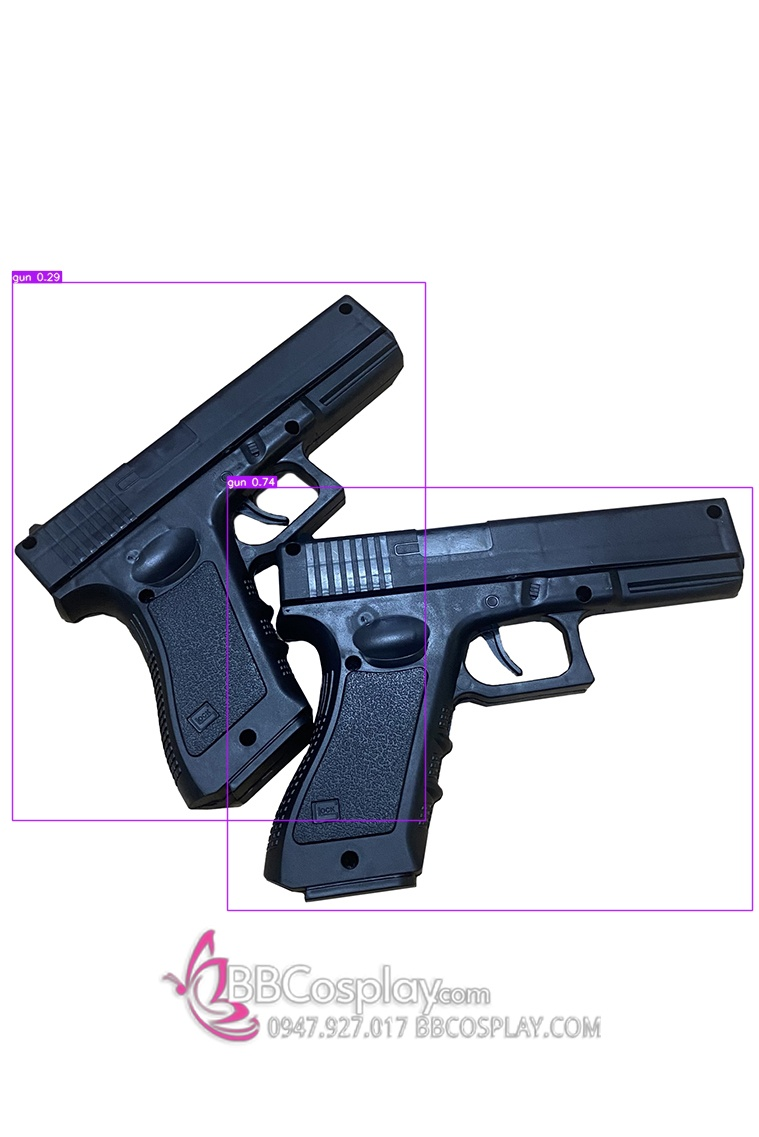

In [22]:
#xem anh
from IPython.display import Image, display
display(Image(filename="/content/drive/MyDrive/yolov7_train/yolov7/runs/detect/exp4/sung-ngan-2.jpg"))

In [23]:
%cd test_images
!wget https://png.pngtree.com/element_origin_min_pic/16/09/23/1557e4d54251680.jpg
!wget https://media-cdn-v2.laodong.vn/Storage/NewsPortal/2020/9/22/838412/Jisoo1.jpg
!wget https://demoda.vn/wp-content/uploads/2022/03/anh-con-chim.jpg

/content/drive/MyDrive/yolov7_train/yolov7/test_images
--2023-12-20 17:40:22--  https://png.pngtree.com/element_origin_min_pic/16/09/23/1557e4d54251680.jpg
Resolving png.pngtree.com (png.pngtree.com)... 104.18.3.157, 104.18.2.157, 2606:4700::6812:29d, ...
Connecting to png.pngtree.com (png.pngtree.com)|104.18.3.157|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16945 (17K) [image/jpg]
Saving to: ‘1557e4d54251680.jpg’

1557e4d54251680.jpg 100%[===================>]  16.55K  --.-KB/s    in 0.002s  

2023-12-20 17:40:22 (9.30 MB/s) - ‘1557e4d54251680.jpg’ saved [16945/16945]

--2023-12-20 17:40:22--  https://media-cdn-v2.laodong.vn/Storage/NewsPortal/2020/9/22/838412/Jisoo1.jpg
Resolving media-cdn-v2.laodong.vn (media-cdn-v2.laodong.vn)... 128.1.50.190, 156.59.55.29, 156.59.55.30, ...
Connecting to media-cdn-v2.laodong.vn (media-cdn-v2.laodong.vn)|128.1.50.190|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 89754 (88K) [image/jpeg]
Savi

In [28]:
%cd /content/drive/MyDrive/yolov7_train/yolov7
!python detect.py --weights runs/train/exp2/weights/best.pt --source test_images/anh-con-chim.jpg

/content/drive/MyDrive/yolov7_train/yolov7
Namespace(weights=['runs/train/exp2/weights/best.pt'], source='test_images/anh-con-chim.jpg', img_size=640, conf_thres=0.25, iou_thres=0.45, device='', view_img=False, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=False)
YOLOR 🚀 v0.1-128-ga207844 torch 2.1.0+cu121 CUDA:0 (Tesla T4, 15102.0625MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 314 layers, 36481772 parameters, 6194944 gradients, 103.2 GFLOPS
 Convert model to Traced-model... 

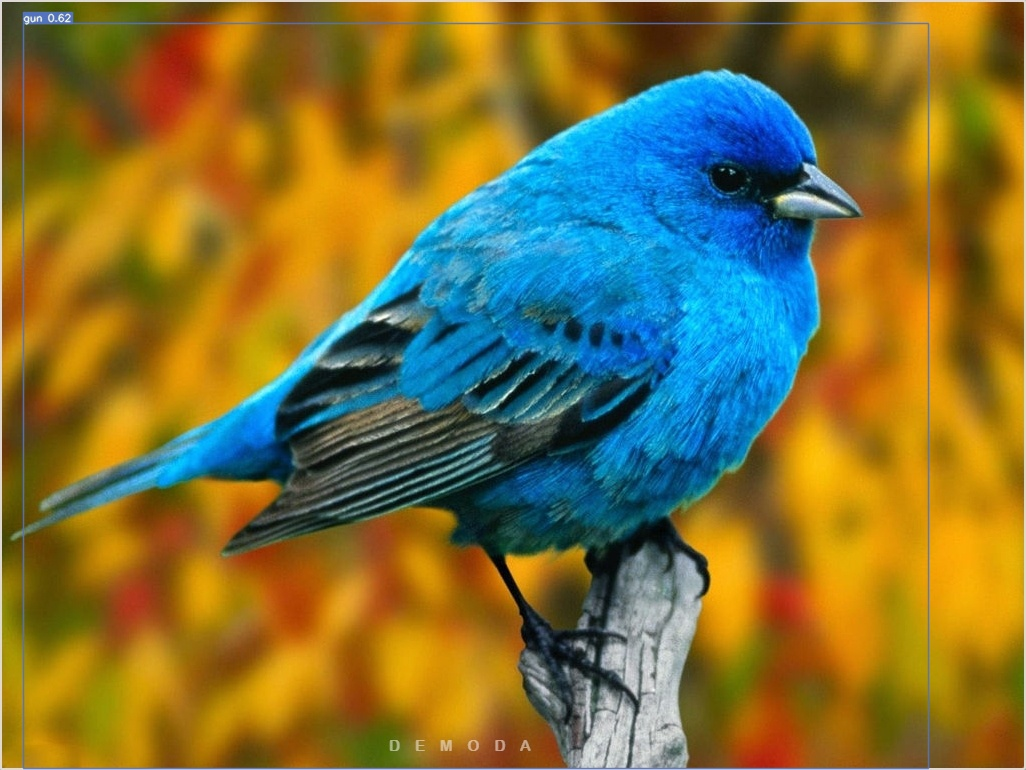

In [29]:
#xem anh
from IPython.display import Image, display
display(Image(filename="/content/drive/MyDrive/yolov7_train/yolov7/runs/detect/exp7/anh-con-chim.jpg"))

In [26]:
%cd /content/drive/MyDrive/yolov7_train/yolov7
!python detect.py --weights runs/train/exp2/weights/best.pt --source test_images/Jisoo1.jpg

/content/drive/MyDrive/yolov7_train/yolov7
Namespace(weights=['runs/train/exp2/weights/best.pt'], source='test_images/Jisoo1.jpg', img_size=640, conf_thres=0.25, iou_thres=0.45, device='', view_img=False, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=False)
YOLOR 🚀 v0.1-128-ga207844 torch 2.1.0+cu121 CUDA:0 (Tesla T4, 15102.0625MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 314 layers, 36481772 parameters, 6194944 gradients, 103.2 GFLOPS
 Convert model to Traced-model... 
 trac

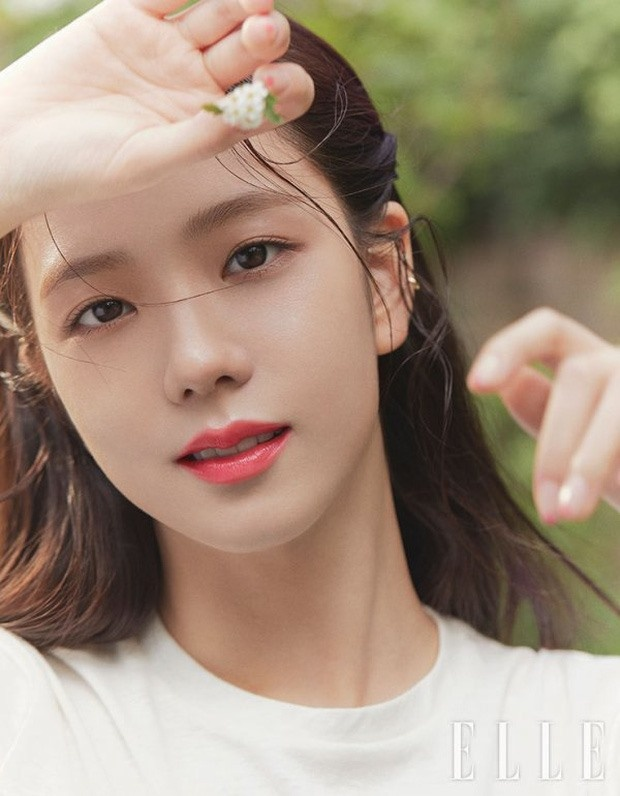

In [27]:
#xem anh
from IPython.display import Image, display
display(Image(filename="/content/drive/MyDrive/yolov7_train/yolov7/runs/detect/exp6/Jisoo1.jpg"))

In [30]:
%cd /content/drive/MyDrive/yolov7_train/yolov7
!python detect.py --weights runs/train/exp2/weights/best.pt --source test_images/1557e4d54251680.jpg

/content/drive/MyDrive/yolov7_train/yolov7
Namespace(weights=['runs/train/exp2/weights/best.pt'], source='test_images/1557e4d54251680.jpg', img_size=640, conf_thres=0.25, iou_thres=0.45, device='', view_img=False, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=False)
YOLOR 🚀 v0.1-128-ga207844 torch 2.1.0+cu121 CUDA:0 (Tesla T4, 15102.0625MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 314 layers, 36481772 parameters, 6194944 gradients, 103.2 GFLOPS
 Convert model to Traced-model.

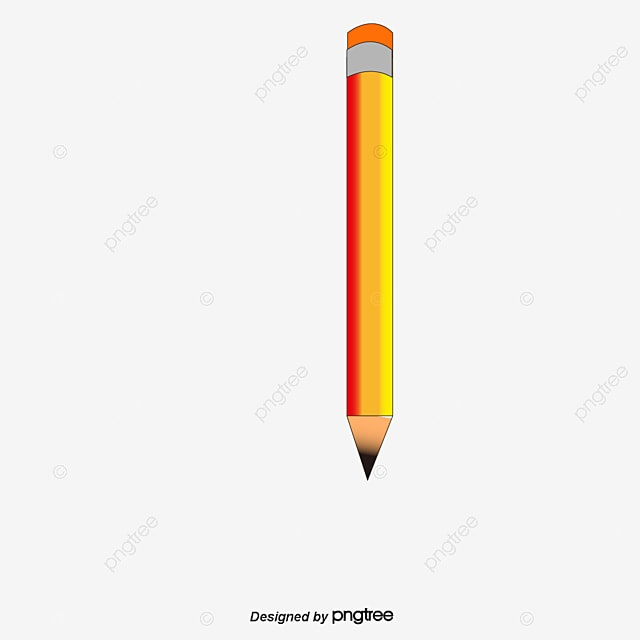

In [31]:
#xem anh
from IPython.display import Image, display
display(Image(filename="/content/drive/MyDrive/yolov7_train/yolov7/runs/detect/exp8/1557e4d54251680.jpg"))